In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("C://Users//Sanjana Sree//Desktop//SANJU//Medical_Facility_Dataset.csv")  # Replace with the correct path

# Preview the dataset
df.head()


,City Tier,Medical Facility Type,Number of Doctors,Number of Patients
0,Tier 4,NaN,218,7149
1,Tier 3,Diagnostic Center,139,7557
2,Tier 4,Primary Health Center,150,3878
3,Tier 4,Local Clinic,86,5154
4,Tier 2,Diagnostic Center,300,920


In [51]:
print(df.head())


  City Tier  Medical Facility Type  Number of Doctors  Number of Patients  \
0    Tier 4                 Clinic           1.048928            1.190885   
1    Tier 3      Diagnostic Center           1.023165            1.192587   
2    Tier 4  Primary Health Center           1.027702            1.171263   
3    Tier 4           Local Clinic           0.992707            1.180592   
4    Tier 2      Diagnostic Center           1.065803            1.117559   

  Health_Risk_Profile  
0       Moderate Risk  
1       Moderate Risk  
2       Moderate Risk  
3       Moderate Risk  
4       Moderate Risk  


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City Tier              200 non-null    object 
 1   Medical Facility Type  200 non-null    object 
 2   Number of Doctors      200 non-null    float64
 3   Number of Patients     200 non-null    float64
 4   Health_Risk_Profile    200 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.9+ KB
None


In [53]:
print(df.describe())

       Number of Doctors  Number of Patients
count         200.000000          200.000000
mean            1.039963            1.169094
std             0.050815            0.034446
min             0.786048            0.976519
25%             1.022293            1.157765
50%             1.058474            1.179276
75%             1.076088            1.192701
max             1.090430            1.200776


In [5]:
df.isnull().sum()

City Tier                 0
Medical Facility Type    38
Number of Doctors         0
Number of Patients        0
dtype: int64

In [35]:
# Check for missing values before filling
print("Missing values before filling:")
print(df.isnull().sum())

# Fill missing numerical values with median (for numerical columns only)
df.select_dtypes(include='number').fillna(df.select_dtypes(include='number').median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
df['City Tier'] = df['City Tier'].fillna(df['City Tier'].mode()[0])
df['Medical Facility Type'] = df['Medical Facility Type'].fillna(df['Medical Facility Type'].mode()[0])

# Check for missing values after filling
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values before filling:
City Tier                0
Medical Facility Type    0
Number of Doctors        0
Number of Patients       0
dtype: int64

Missing values after filling:
City Tier                0
Medical Facility Type    0
Number of Doctors        0
Number of Patients       0
dtype: int64


In [36]:
# Check for duplicates
print("Number of duplicates before removal:", df.duplicated().sum())

# Remove duplicates if found
df = df.drop_duplicates()

# Check for duplicates again after removal
print("Number of duplicates after removal:", df.duplicated().sum())


Number of duplicates before removal: 0
Number of duplicates after removal: 0


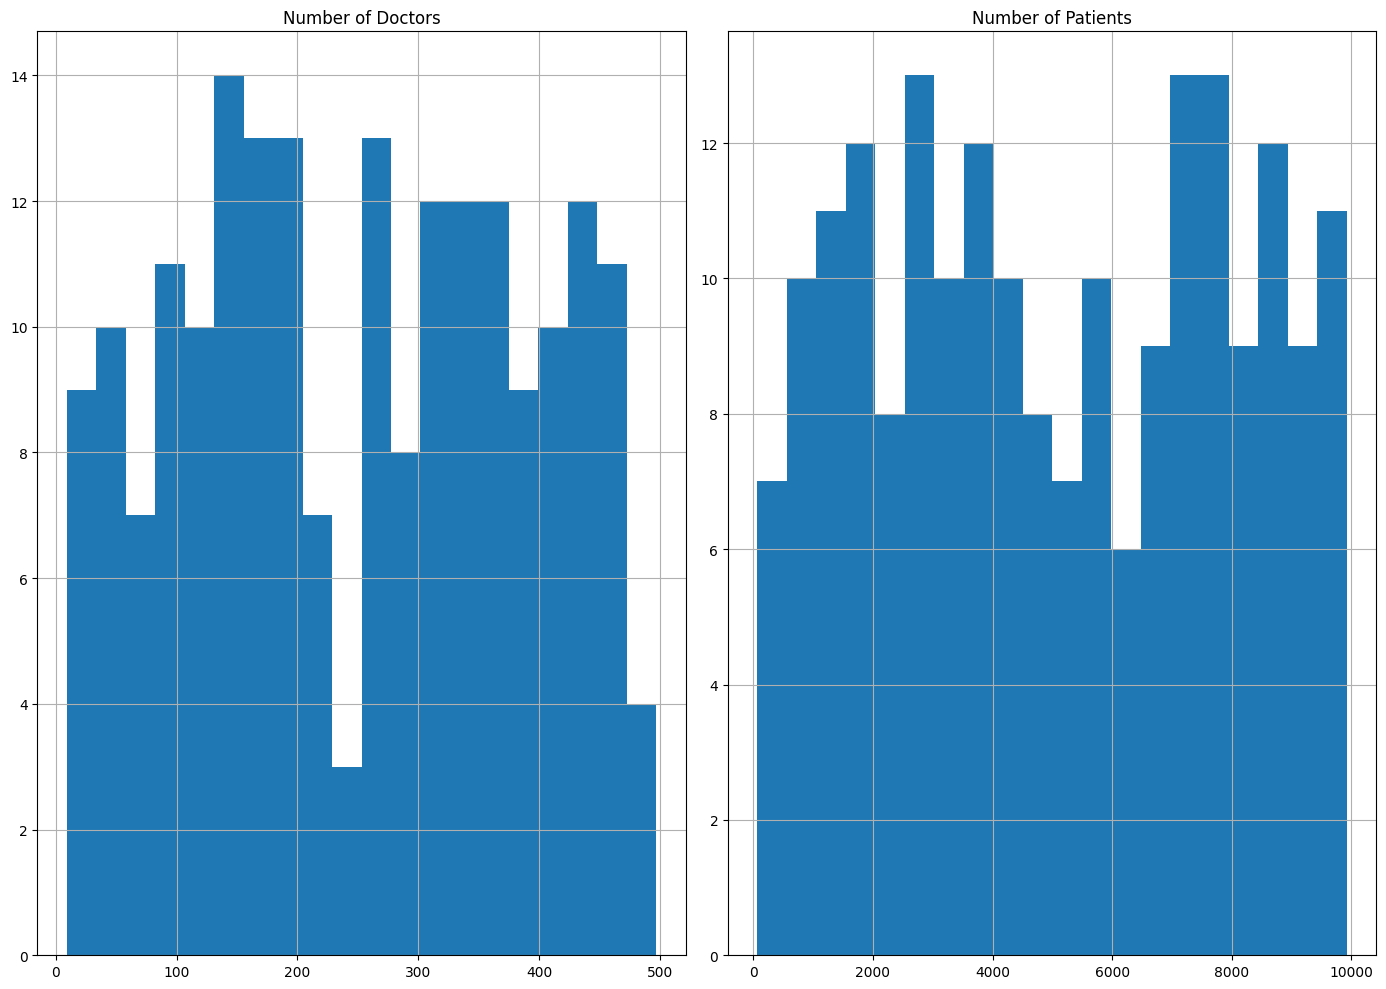

In [33]:
# Plot histograms for each numerical feature
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

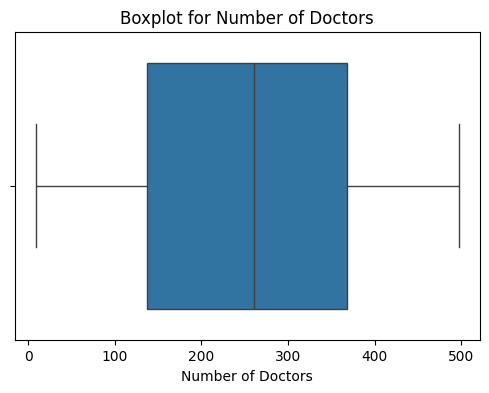

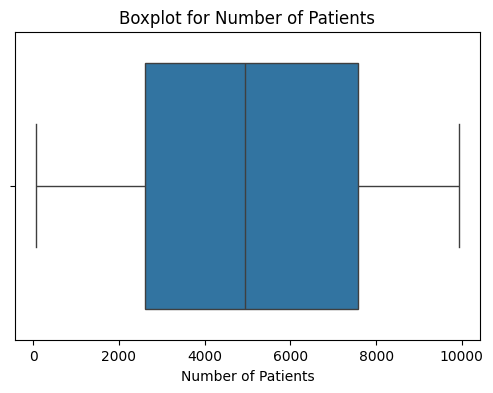

In [16]:
# Plotting boxplot for each numerical column to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

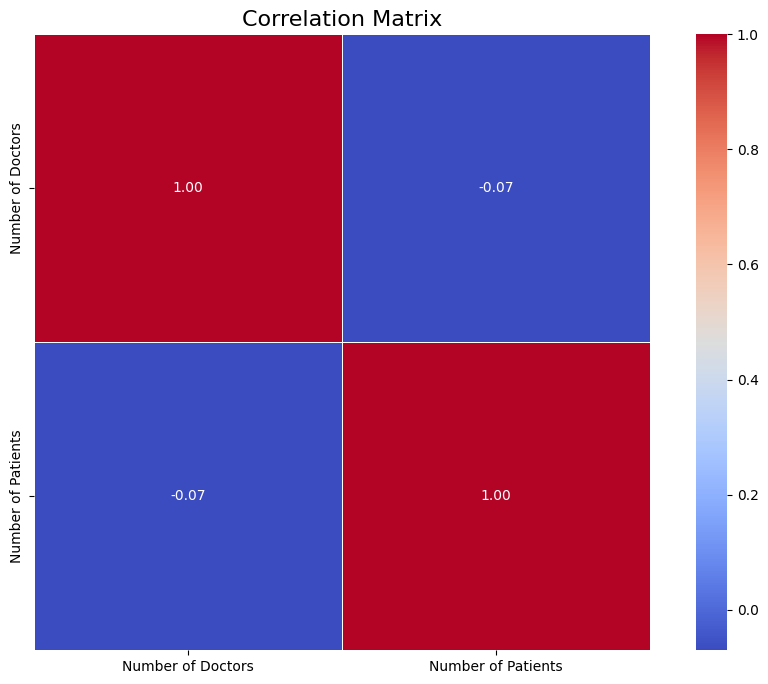

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_df = df.select_dtypes(include='number')

# Create a correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Display the plot
plt.show()


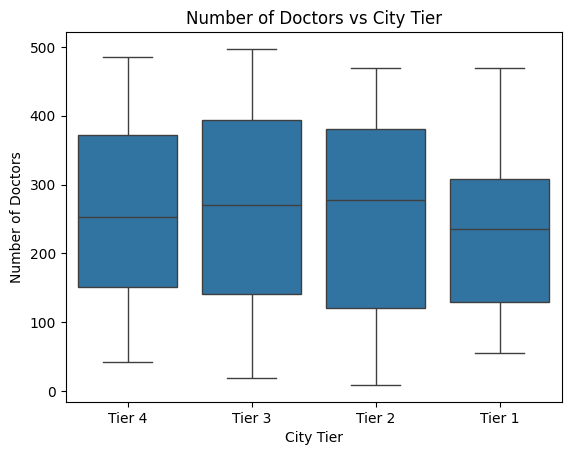

In [39]:

# Example: Boxplot to check how 'Number of Doctors' relates to 'City Tier'
sns.boxplot(x='City Tier', y='Number of Doctors', data=df)
plt.title('Number of Doctors vs City Tier')
plt.xlabel('City Tier')  # Label for the x-axis
plt.ylabel('Number of Doctors')  # Label for the y-axis
plt.show()


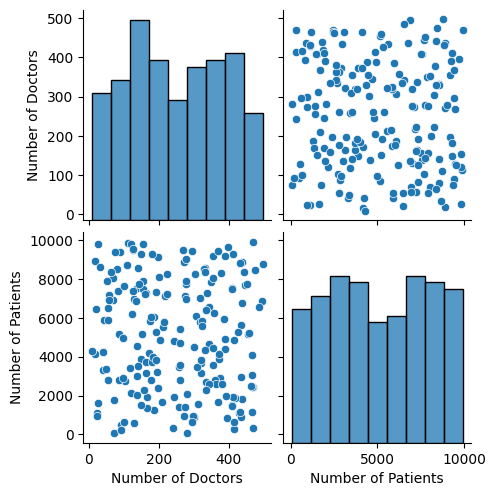

In [40]:


# Example: Using a pairplot to explore relationships between key numerical features
sns.pairplot(df[['Number of Doctors', 'Number of Patients', 'City Tier']])  # Replace with relevant numerical columns
plt.show()


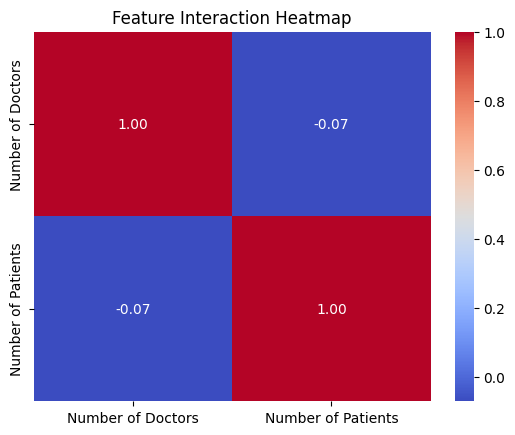

In [45]:
# Plotting a heatmap for specific interactions you want to explore
sns.heatmap(df[['Number of Doctors', 'Number of Patients']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Interaction Heatmap')
plt.show()
